In [74]:
import pandas as pd

connection_fp=r'./data/oveview of digital design research.xlsx'
connection=pd.read_excel(connection_fp,sheet_name='section_keywords',header=[0],engine='openpyxl')
connection=connection[connection.filter(regex='^(?!Unnamed)').columns]
print(connection.columns)

Index(['section', 'subsection', 'note', 'keyword', 'case', '数字化', '数据化',
       '信息化_管理', '信息化_规划设计-模型', '物联网', '标准导则', '其它'],
      dtype='object')


In [75]:
ffill_columns=['section', 'subsection', 'note', 'keyword']
connection[ffill_columns]=connection[ffill_columns].fillna(method='ffill')

classi=['数字化', '数据化','信息化_管理', '信息化_规划设计-模型', '物联网', '标准导则', '其它']
connection['edges']=connection.apply(lambda row:[(row['keyword'],i) if pd.isna(row['case']) else (row['case'],i) for i in classi if row[i]==1],axis=1)

print(connection.edges)

0                    [(“中国数字景观国际研讨会”, 其它)]
1                       [(国家自然科学基金方面, 其它)]
2                             [(著作方面, 其它)]
3                             [(论文方面, 其它)]
4                           [(教学内容方面, 其它)]
                      ...                 
75                       [(LIM应用项目实证, 其它)]
76            [(LIM向CIM融合用于城市治理的应用场景, 其它)]
77                       [(LIM技术应用成果, 其它)]
78    [(LIM数据资源开发, 数字化), (LIM数据资源开发, 数据化)]
79                      [(中堪协BIM应用大赛, 其它)]
Name: edges, Length: 80, dtype: object


In [76]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import itertools
import random

In [77]:
flatten_lst=lambda lst: [m for n_lst in lst for m in flatten_lst(n_lst)] if type(lst) is list else [lst]

nodes_columns=['section', 'subsection', 'note', 'keyword', 'case']
nodes=flatten_lst([pd.unique(connection[nodes_column]).tolist() for nodes_column in nodes_columns]+classi)
nodes_idx_mapping={v:i for i,v in enumerate(nodes)}
print(nodes)

['数字景观理论及相关研究', '“智慧园林”信息化管理平台', '风景园林遗产信息化', '风景园林信息模型', '研究进展', '成果概述', '研究内容', '数字景观理论研究形成具有重要影响力的学术研究平台', '数字景观成为当下国内风景园林业界的研究热点之一', '基础资料的数字化', '数字化管理应用在行政审批管理和行业信息交流', '城市园林绿化遥感调查与测评工作', '数字园林、智慧园林等信息平台建设', '省级主管部门着手开展多层级的风景园林信息化体系建设研究', '园林绿化信息化试点探索', '各地方智慧园林系统建设', '园林绿化信息化标准发布', '支撑智慧园林的监测关键技术', '包含的研究内容', '主要研究内容归纳', '风景园林遗产测绘手段的提升与创新', '风景园林遗产特征定量化分析技术', '风景园林遗产空间信息管理技术', '风景名胜区信息化监测技术', '风景园林遗产数字化解说与阐释技术', 'LIM应用场景', '多学科融贯和综合', 'LIM实施框架', 'LIM研究的主要内容', '“中国数字景观国际研讨会”', '国家自然科学基金方面', '著作方面', '论文方面', '教学内容方面', '数字景观实验室、虚拟仿真实验平台', '城市已有的园林绿化规划设计成果', '园林绿化历史资料档案', '城市重要园林苗木信息', '园林绿化管理部门的行政管理', '对外窗口', '与市民的互动平台', '在空间上摸清了园林绿化家底数据', '运用数据进行精细化管理和辅助决策', '多层级的风景园林信息化体系建设', '实现了基于园林绿化“一张图”的绿地信息的空间查询、分类管理、统计分析和更新维护', '对城市园林绿化情况作出科学评价与辅助决策', '北京市智慧园林建设', '开封市智慧园林建设', '河南省“省-市”两级管理平台实践', '《城市园林绿化监督管理信息系统工程技术标准》（CJJ/T302-2019）', '重点研发课题《城镇生态资源高分遥感与地面协同监测关键技术研究》', '信息收集', '对象特征识别与分析', '信息管理', '遗产信息的应用', '风景园林遗产的测绘', '特征定量化分析技术', '空间信息管理技术', '数字化解说与阐释', '风景名胜区信息化监测', '园林遗产三维数字化测绘技术和方法'

In [116]:
opacity=0.4
cmap=plt.get_cmap('gist_ncar') #'gnuplot'  'gist_ncar'  'gist_earth'  'gist_stern' 'twilight_shifted'
list_itemReplace=lambda lst,idx,v:[lst[i] if i!=idx else v for i in range(len(lst)) ]
nodes_colors=['rgba'+str(tuple(list_itemReplace([int(j*255) for j in cmap(i)],3,opacity))) for i in np.linspace(0, 1, len(nodes))]
random.shuffle(nodes_colors)

In [117]:
section2subsection=list(connection[['section', 'subsection']].itertuples(index=False,name=None))
subsection2note=list(connection[['subsection', 'note']].itertuples(index=False,name=None))

#section2note=list(connection[['section', 'note']].itertuples(index=False,name=None))

note2keyword=list(connection[['note', 'keyword']].itertuples(index=False,name=None))
keyword2case=list(connection[['keyword', 'case']].dropna().itertuples(index=False,name=None))

kw_classi=list(itertools.chain(*connection['edges'].to_list()))
edges_mapping=section2subsection+subsection2note+note2keyword+keyword2case+kw_classi
#edges_mapping=section2note+note2keyword+keyword2case+kw_classi

In [118]:
edge_source=[nodes_idx_mapping[i[0]] for i in edges_mapping]
edge_target=[nodes_idx_mapping[i[1]] for i in edges_mapping]

link_num=len(edge_source)
link_value=[1]*link_num #further adjust

opacity_edge=0.2
link_color_rgba=[nodes_colors[src].replace(str(opacity),str(opacity_edge)) for src in edge_target]
link_label=[""]*link_num

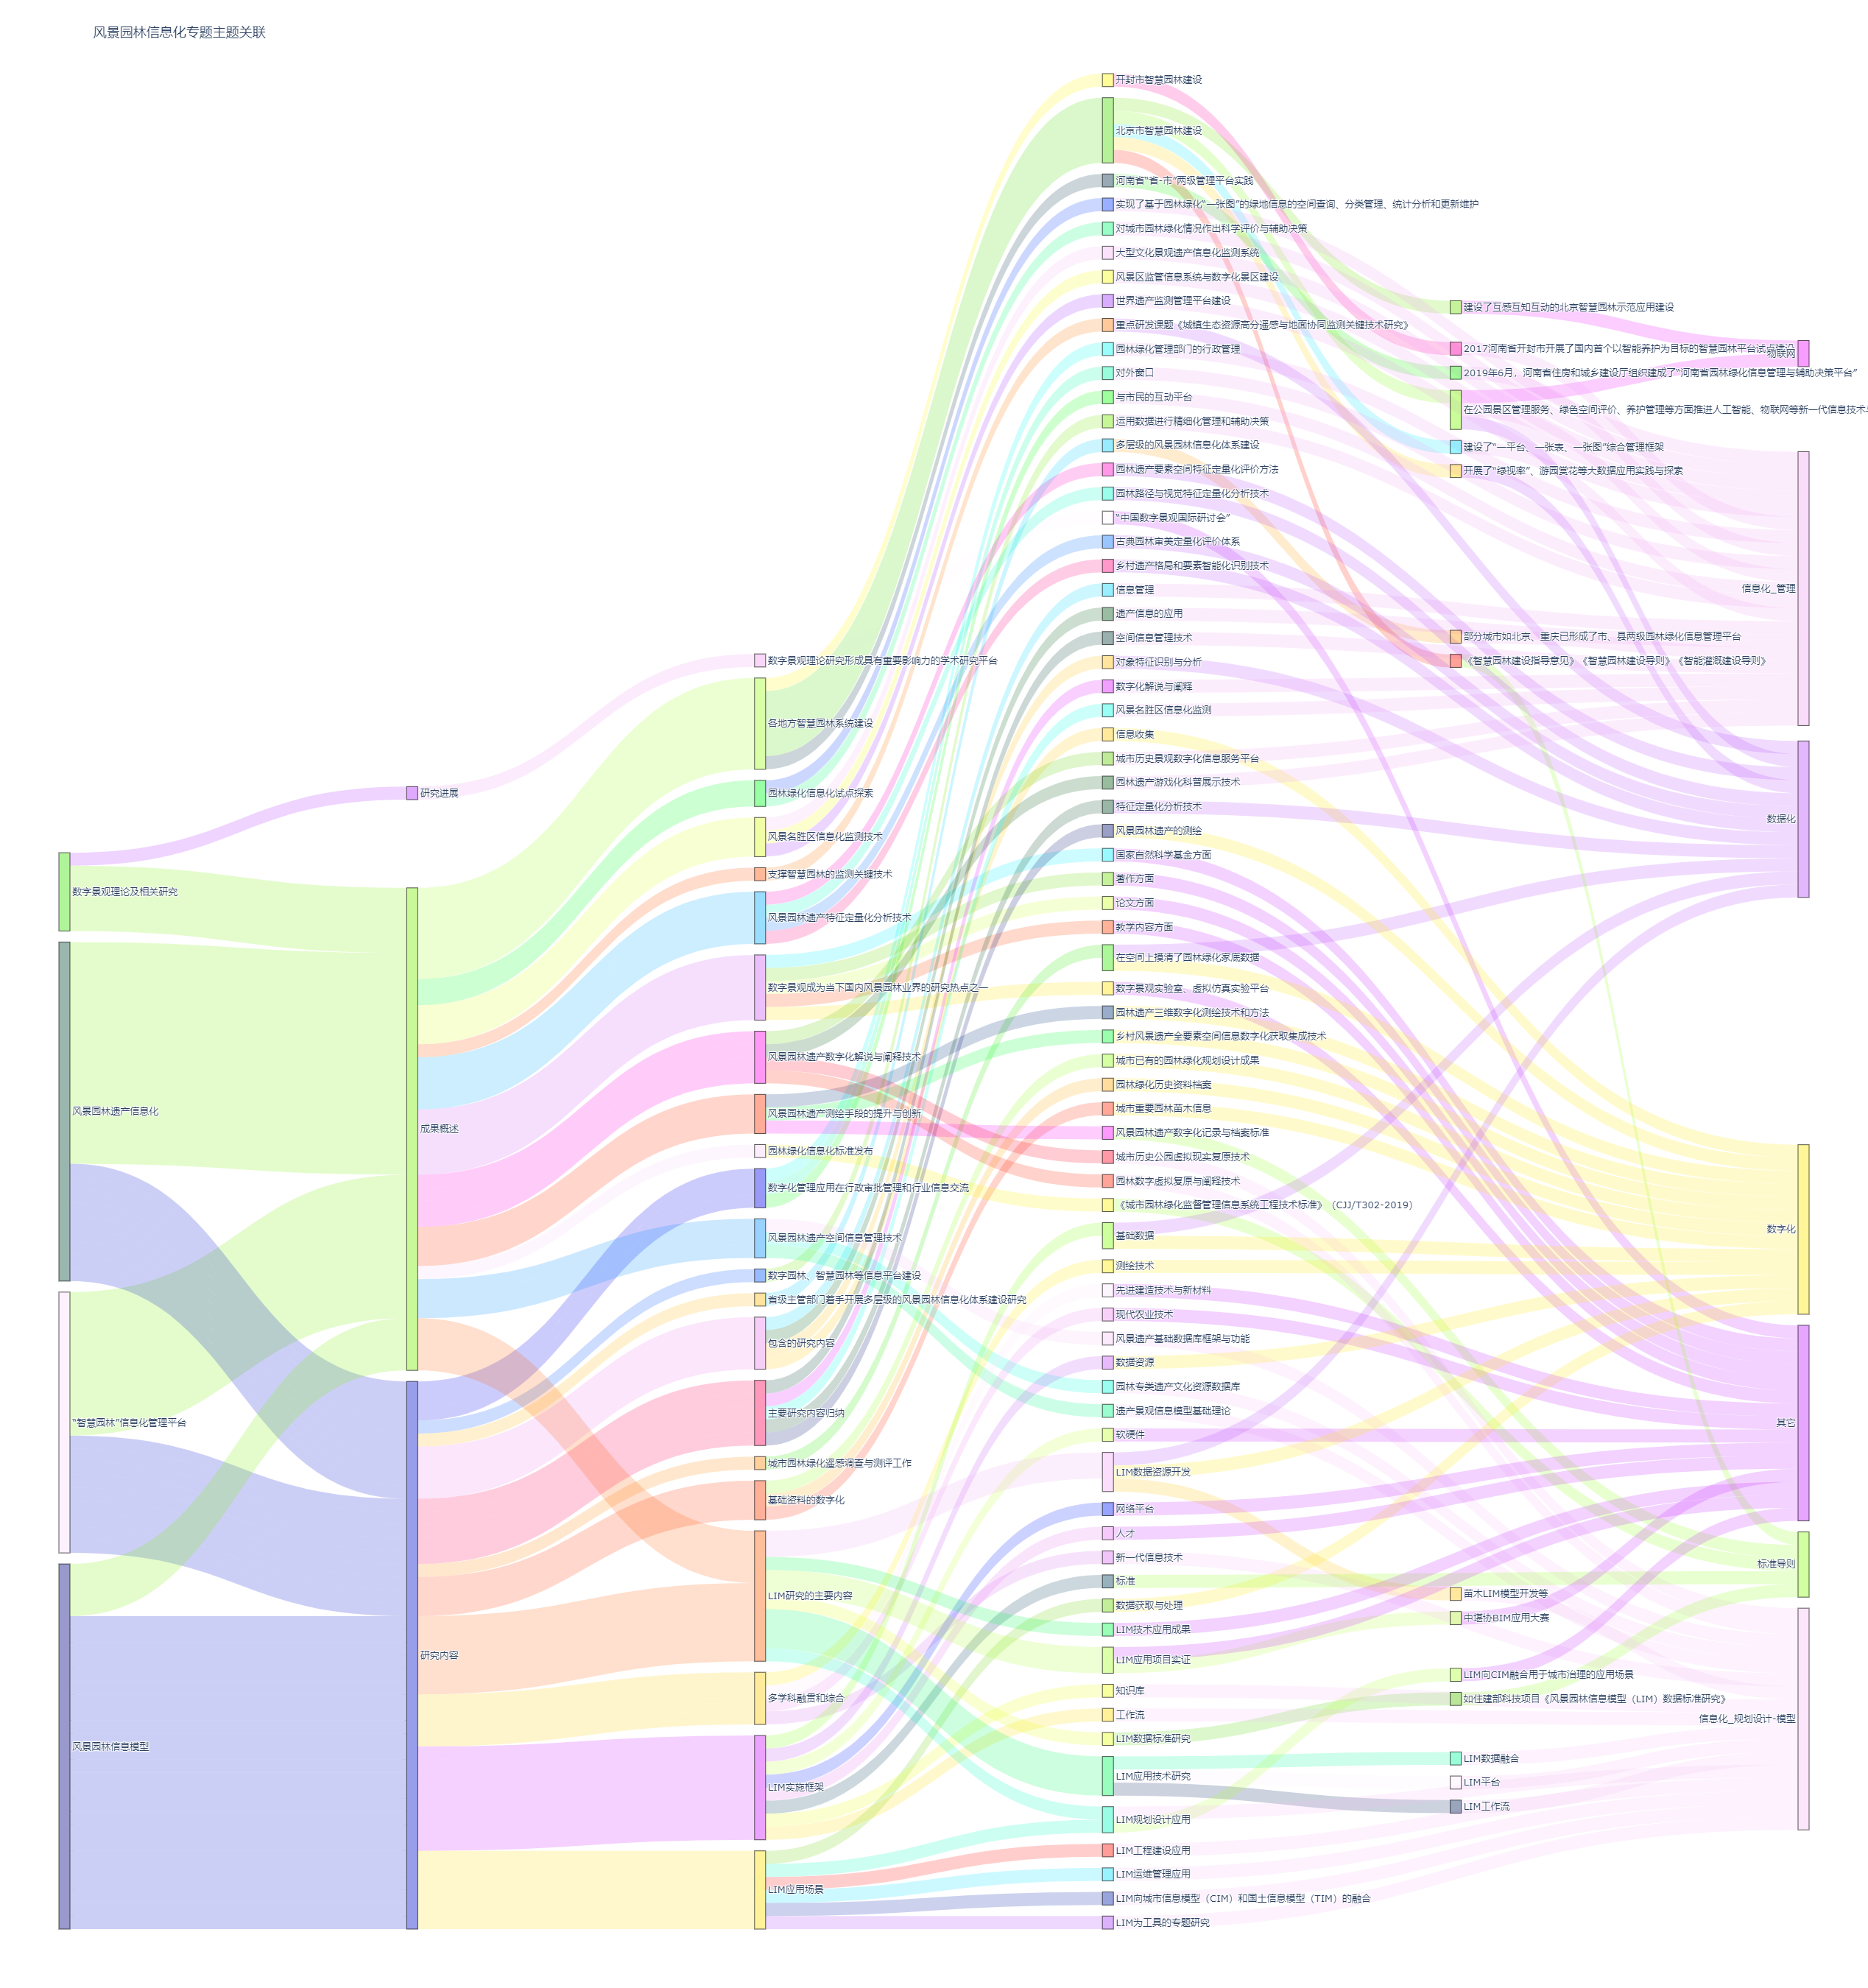

In [119]:
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =nodes,
      color =nodes_colors
    ),
    # Add links
    link = dict(
      source =edge_source,
      target =edge_target,
      value=link_value,
      label=link_label,
      color =link_color_rgba
))])


title_text="风景园林信息化专题主题关联"
font_size=13
height=2700
fig.update_layout(title_text=title_text,font_size=font_size,height=height)
fig.show()

html_savePath='./html/digital thematic subject association_s.html' #_m
fig.write_html("%s"%html_savePath)